# Conversion Rate
## Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
** Your project is to: **
(1) understand what's working well (and potentially scale it even further) and what's not working well (and fix it).
(2) Predict conversion rate
(3) Come up with recommendations for the product team and the marketing team to improve conversion rate

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data and give a picture of data

In [2]:
conversion_data = pd.read_csv('01. conversion_project.csv')

In [3]:
conversion_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
conversion_data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


we have 6 variables:country,age,new_user,source,total_pages_visited,converted;
5 of them are factors, converted is result;
in total, we have 316200 entries;
avg of age is 31, over a half is new user, avg of pages every user visited is 5, and the conversion rate is nearly 3%.

### plot data distribution

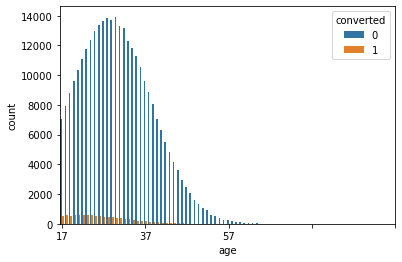

In [45]:
ax = sns.countplot(x='age',data=conversion_data,hue='converted')
ax.set_xticks(ticks=[0,20,40,60,80])

<AxesSubplot:xlabel='age'>

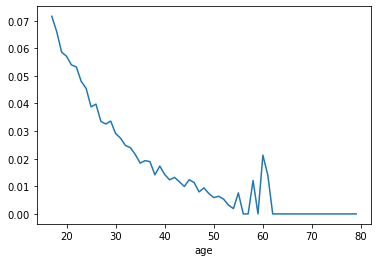

In [174]:
conversion_data.groupby('age')['converted'].mean().plot.line()

most users aged between 18 and 40.<br>
when users' age increase over 40, the number of them becoming small.<br>
people, aged over 60, almost unlikely becomes users.<br>
many users eventually buy something, whoes age is between 17 and 37 year old.<br>
we can see the converation rate of old user is over four times than that of new users.<br>

C:\Users\chaoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_user'>

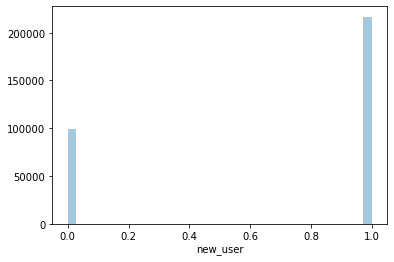

In [51]:
sns.distplot(conversion_data['new_user'],kde=False)

<AxesSubplot:xlabel='new_user'>

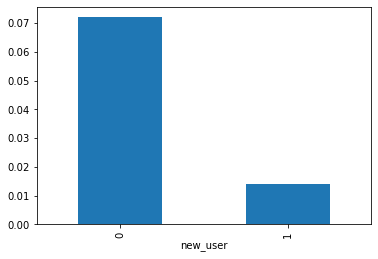

In [156]:
conversion_data.groupby('new_user')['converted'].mean().plot(kind='bar')

the number of new users is almost twice of old users.<br>

<AxesSubplot:xlabel='total_pages_visited', ylabel='count'>

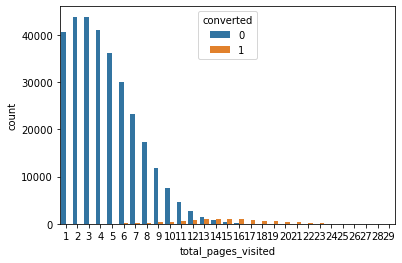

In [44]:
sns.countplot(x='total_pages_visited',data=conversion_data,hue='converted')

<AxesSubplot:xlabel='total_pages_visited'>

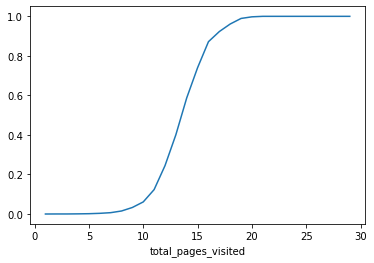

In [175]:
conversion_data.groupby('total_pages_visited')['converted'].mean().plot.line()

most users visited 1-5 pages. the number of users decrease, when they visited over 5 pages. almost no users visit over 25 pages.<br>
many users visited more pages, who is more likely to buy something eventually.<br>
we can see users who visited more pages tender to have high convertion rate.<br>

<AxesSubplot:>

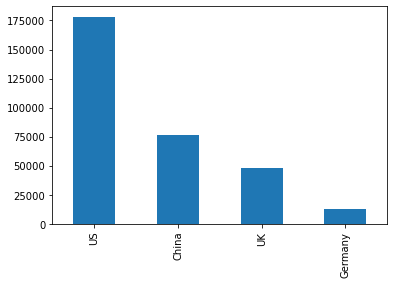

In [18]:
conversion_data['country'].value_counts().plot.bar()

<AxesSubplot:xlabel='country'>

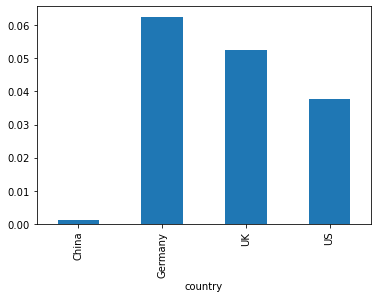

In [158]:
conversion_data.groupby('country')['converted'].mean().plot(kind='bar')

almost a half users is from US.<br>
and then coming from China or UK.<br>
very few users from Germany, almost fewer than 1/10.<br>
we can see users from China have quite low convertion_rate although there are quite many users from China. <br>
UK,US,Germany users have around 5% convention rate.<br>

<AxesSubplot:>

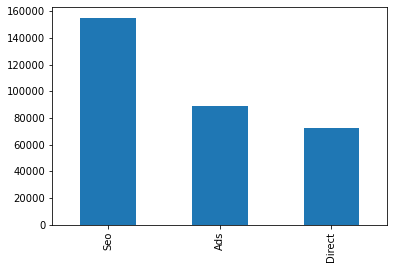

In [19]:
conversion_data['source'].value_counts().plot.bar()

<AxesSubplot:xlabel='source'>

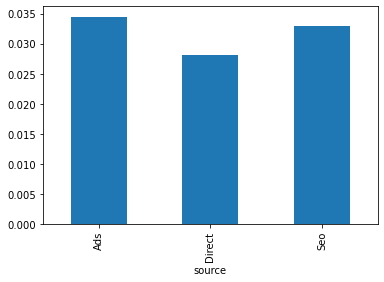

In [160]:
conversion_data.groupby('source')['converted'].mean().plot(kind='bar')

we can see, almost a half users come to the site by clicking on search results.<br>
over a quarter users by clicking on an advertisement.<br>
the rest users by typing URL on the browser.<br><br>
we can see source has weak impact in convertion rate, especially source from between ads and seo.

###  cleaning data 

<AxesSubplot:>

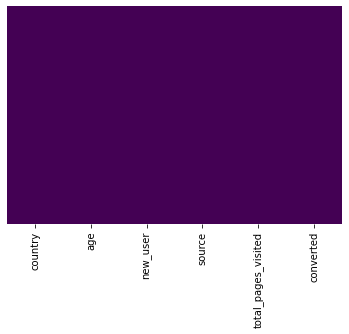

In [53]:
sns.heatmap(conversion_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see we donot missing data.

<AxesSubplot:xlabel='age'>

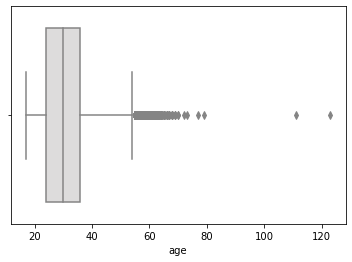

In [52]:
sns.boxplot(x="age",data=conversion_data,palette='coolwarm')

In [60]:
# we can use IQR to replace outlier, however in this case, we find that user aged 56 is not that abnormal.
# but in common sense, user aged over 100,which is not normal,so we replace those age with medium
# Q1 = conversion_data['age'].quantile(0.25)
# Q3 = conversion_data['age'].quantile(0.75)
# IQR = Q3 - Q1
# print(conversion_data[(conversion_data['age'] < (Q1 - 1.5 * IQR)) |(conversion_data['age'] > (Q3 + 1.5 * IQR))])
conversion_data.loc[conversion_data['age'] >100,'age'] =30

In [62]:
from sklearn.feature_selection import chi2

In [63]:
chi_table = conversion_data.copy()

In [64]:
chi_table=pd.get_dummies(chi_table)
chi_table

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1


In [65]:
y = chi_table['converted']
X = chi_table.drop('converted',axis=1)
scores, pvalues = chi2(X,y)

In [66]:
pvalues

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       3.55366590e-085, 4.05710472e-142, 5.25926285e-040, 1.76227698e-004,
       4.72245974e-010, 1.55940432e-001])

In [67]:
scores

array([5.62641892e+03, 2.30914908e+03, 2.02697509e+05, 2.34695073e+03,
       3.82500000e+02, 6.44210526e+02, 1.75257732e+02, 1.40689655e+01,
       3.87887324e+01, 2.01315789e+00])

from chi test, we can see all factors, except source from search affect convention rate.however source has a weak impact.

we can see the older user tends to have lower convention rate. <br>
things are quite different, users aged around 60 tend to have a not low convention rate.

In [126]:
table = conversion_data.copy()

In [127]:
table=pd.get_dummies(table,drop_first=True)

In [128]:
y = table['converted']
X = table.drop('converted',axis=1)
chi2(X,y)

(array([5.62641892e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [129]:
table.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


from this part we can see all of there factors have impact in results.<br>
users aged under 40 tender to have a high convention rate.<br>
users visited more pages tender to have a high convention rate.<br>
users comes from China tender to have a low convention rate.<br>
different sources tender to have a weak impact on convention rate.<br>

### bulid svm model <br>
svm model always have not bad results. which is a good start.<br>
maybe random forrest or RuleFit, which have good explanation.<br>

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [138]:
from sklearn.svm import SVC

In [139]:
model = SVC()

In [140]:
model.fit(X_train,y_train)

SVC()

In [145]:
pred = model.predict(X_test)

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.89      0.60      0.72      2989

    accuracy                           0.99     94860
   macro avg       0.94      0.80      0.86     94860
weighted avg       0.98      0.99      0.98     94860



In [148]:
print(confusion_matrix(y_test,pred))

[[91649   222]
 [ 1190  1799]]


our svm model have a high accuracy 98% .<br>
however, both TP and FN value is small.<br> which means we classify converted users as non-converted users

In [149]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred,pos_label=1)

In [150]:
fpr

array([0.        , 0.00241643, 1.        ])

In [151]:
tpr

array([0.        , 0.60187354, 1.        ])

In [152]:
thresholds

array([2, 1, 0], dtype=int64)

### Conclusion<br>
(1) younger users tend to have a high conversion rate,we should encourage more young men and women to join.<br>
(2) the results turns out that old users have a higher conversion rate, we should email or give gift cards to old users periodicity, to encourage them to buy more.<br>
(3) China users tend to have very low convertion rate, we should find why and do more localization changes.<br>
although Germany users have high convention rate, we donot have quite many Germany users. we should encourage more Germany to join.<br>
(4) the more pages the users visited, they tend to have a higher convention rate, we should give more recommendations, encourage users visit more pages.<br>
(5) the sources have weak impact on convertion rate, we can neglect it.<br>
(6) our svm model has a higher accuracy.<br>
(7) given more time, we can try regression, random forrest and RuleFit, which can give another sight into data.<br>
(8) given more time, we could draw and analyze ROC curve.<br>